<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220628.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor 
* customer analysis

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotnine as gg 
from plotnine import ggplot, aes 
import os 
from datetime import datetime, date, time, timezone, timedelta 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans 
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error
import sklearn.datasets as skd

# regressor

In [3]:
raw = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/fraud_data.csv')
raw.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [4]:
raw.columns = [a.lower() for a in raw.columns]
raw.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


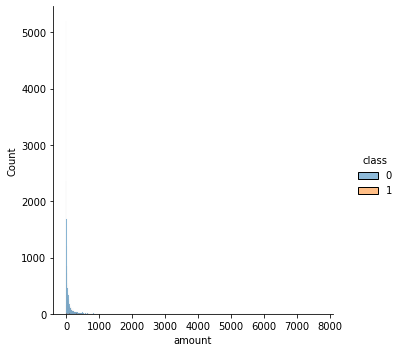

In [6]:
sns.displot(data = raw, x = 'amount', hue = 'class')

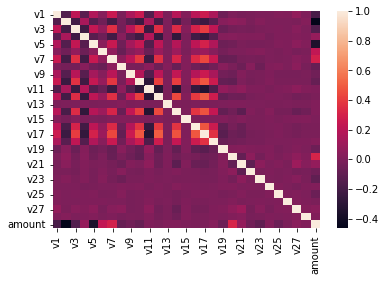

In [12]:
sns.heatmap(raw.iloc[:,0:29].corr())

In [13]:
x = raw[['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount']]
y = raw['class']

In [14]:
scaler = RobustScaler()
x_std = scaler.fit_transform(x)
x_std = pd.DataFrame(x_std, columns = x.columns)

In [16]:
x_std.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
0,0.520709,0.175966,0.181670,0.653250,-0.231964,-0.384477,0.047668,-0.172929,-0.152697,0.254588,...,-0.229172,-0.204484,-0.326260,0.227085,0.586464,0.601261,-0.950970,0.078394,0.046640,-0.243004
1,0.300022,-2.838589,-2.005440,-0.699310,-0.511267,-0.188817,0.892793,-1.216680,-1.746421,1.626960,...,4.011656,1.617655,0.248375,-3.138474,0.163675,0.519394,0.425289,-1.560625,0.331173,12.516524
2,0.504748,0.267768,0.035526,1.476773,0.310018,0.614419,0.055375,0.280995,-0.583353,0.874666,...,-0.501350,0.048629,0.047991,-0.352252,-0.432700,0.944876,0.296527,-0.087995,-0.131102,-0.294614
3,-0.496479,-2.388467,-0.181787,-1.098874,1.675958,-1.207069,-1.812558,-0.056779,-0.072830,0.968883,...,1.162946,0.370204,0.301492,3.041905,-0.109653,-2.836760,-0.939430,1.592900,2.979030,0.564618
4,-0.143589,0.560374,-0.151786,-0.378913,2.067405,3.190657,0.145059,1.211772,-0.292598,0.232773,...,1.317948,-0.690369,-0.754983,-0.168801,1.162246,-0.657062,0.359607,0.449152,-0.198514,-0.271129


In [17]:
res = [KMeans(n_clusters = a).fit(x_std).inertia_ for a in range(1, 10)]

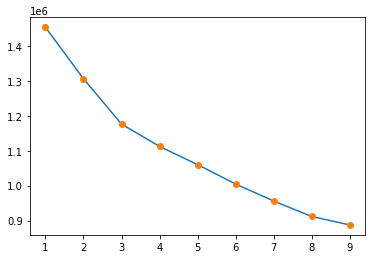

In [19]:
plt.plot(range(1,10), res)
plt.plot(range(1,10), res, 'o')

In [21]:
fit_km = KMeans(n_clusters = 3).fit(x_std)

In [22]:
pca = PCA(n_components = 10)
fit_pca = pca.fit_transform(x_std)

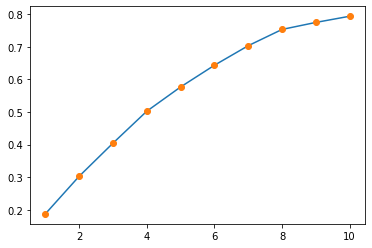

In [24]:
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum())
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum(), 'o')

In [29]:
fit_pca = pd.DataFrame(np.c_[fit_pca, y, fit_km.labels_.reshape(-1,1)], columns = [f'pc{a}' for a in range(1, 11)] + ['y', 'cl'])
fit_pca = fit_pca.assign(y = fit_pca['y'].astype(str),
               cl = fit_pca['cl'].astype(str)
               )
fit_pca.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,y,cl
0,-1.231682,-0.410421,-0.147015,0.247622,0.081408,0.137397,-0.107735,0.201660,0.380958,0.452562,0.0,2.0
1,12.626380,-0.950706,-0.255031,-2.023628,0.743230,-0.059317,1.879581,-1.827049,-0.241948,1.894870,0.0,1.0
2,-1.345588,-0.312595,-0.519395,-0.009585,0.025461,-0.178956,0.458510,0.081557,0.325798,-0.427388,0.0,2.0
3,-0.234840,0.446929,0.178504,2.182149,2.505702,0.381573,-3.118232,-0.200033,-0.100870,3.167864,0.0,2.0
4,-1.009818,0.631886,-1.162892,0.067721,-0.043584,1.354790,-0.215153,-0.701930,-0.124289,-2.440704,0.0,2.0


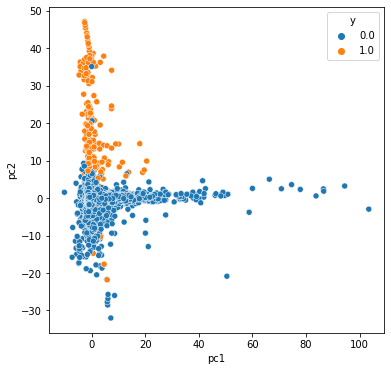

In [30]:
plt.figure(figsize = [6,6])
sns.scatterplot(data  = fit_pca, x = 'pc1', y = 'pc2', hue = 'y')

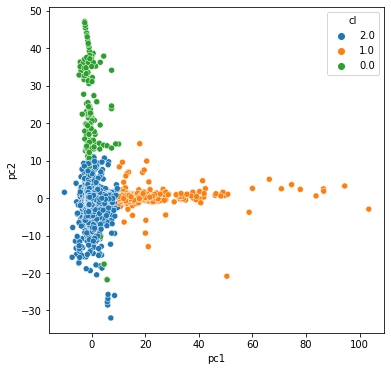

In [31]:
plt.figure(figsize = [6,6])
sns.scatterplot(data  = fit_pca, x = 'pc1', y = 'pc2', hue = 'cl')

In [32]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [39]:
x_tr_std = scaler.fit_transform(x_tr)
x_te_std = scaler.transform(x_te)

In [40]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
fit_rf_std = RandomForestClassifier().fit(x_tr_std, y_tr)

In [41]:
pred_rf = fit_rf.predict(x_te)
pred_rf_std = fit_rf_std.predict(x_te_std)

In [45]:
proba_rf = fit_rf.predict_proba(x_te)[:,-1]
proba_rf_std = fit_rf_std.predict_proba(x_te_std)[:,-1]

In [46]:
accuracy_score(y_te, pred_rf), accuracy_score(y_te, pred_rf_std)

(0.9975414874001229, 0.9975414874001229)

In [47]:
fpr1, tpr1, thre1 = roc_curve(y_te, proba_rf)
fpr2, tpr2, thre2 = roc_curve(y_te, proba_rf_std)

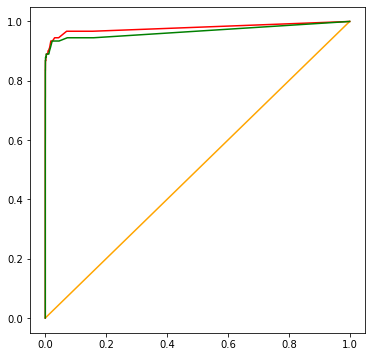

In [51]:
plt.figure(figsize = [6,6])
plt.plot([0,1], [0,1], 'orange')
plt.plot(fpr1, tpr1, color = 'red')
plt.plot(fpr2, tpr2, color = 'green')

# customer analysis

In [52]:
os.listdir()

['.config',
 'retail_data_response.csv',
 'items.csv',
 'sales_train.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'rfm_test.csv',
 '.Rhistory',
 'sample_submission.csv',
 'online_retail_II.xlsx',
 'test.csv',
 'ecommerce-data.csv',
 'shops.csv',
 'item_categories.csv',
 'retail_data_transactions.csv',
 'sample_data']

In [53]:
df = pd.read_excel('online_retail_II.xlsx')

In [54]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [55]:
df.columns = [a.replace(' ', '_').lower() for a in df.columns]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [57]:
df = df[~(df['invoice'].astype(str).str.contains('C')) & (df['country'] == 'United Kingdom')]
df.head()

,invoice,stockcode,description,quantity,invoicedate,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [59]:
df['date'] = df['invoicedate'].to_numpy().astype('datetime64[D]')
df['month'] = df['date'].to_numpy().astype('datetime64[M]')
df['rev'] = df['price'] * df['quantity']

In [60]:
df.columns

Index(['invoice', 'stockcode', 'description', 'quantity', 'invoicedate',
       'price', 'customer_id', 'country', 'date', 'month', 'rev'],
      dtype='object')

In [61]:
df = df[['customer_id', 'date', 'month', 'rev']].rename(columns = {'customer_id':'id'})
df.head()

,id,date,month,rev
0,13085.0,2009-12-01,2009-12-01,83.4
1,13085.0,2009-12-01,2009-12-01,81.0
2,13085.0,2009-12-01,2009-12-01,81.0
3,13085.0,2009-12-01,2009-12-01,100.8
4,13085.0,2009-12-01,2009-12-01,30.0


In [64]:
df = df.groupby(['id', 'date', 'month'])['rev'].sum().reset_index()

In [65]:
df = df.sort_values(['id', 'date'], ascending = [1,0])
df.head()

,id,date,month,rev
6,12346.0,2010-06-28,2010-06-01,142.31
5,12346.0,2010-03-02,2010-03-01,27.05
4,12346.0,2010-01-22,2010-01-01,22.50
3,12346.0,2010-01-14,2010-01-01,22.50
2,12346.0,2010-01-04,2010-01-01,45.00


In [68]:
info_m = df.groupby(['id', 'month'])['rev'].sum().reset_index().rename(columns = {'rev':'money'})
info_m = pd.pivot_table(info_m, index = 'id', columns = 'month', values = 'money').reset_index()
info_m = pd.melt(info_m, id_vars = 'id', var_name = 'month', value_name = 'money').sort_values(['id', 'month'], ascending = [1,0])
info_m = info_m.groupby(['id']).head(3)
info_m = info_m.groupby(['id'])['money'].sum().reset_index()
info_m.head()

,id,money
0,12346.0,0.00
1,12608.0,415.79
2,12745.0,0.00
3,12746.0,0.00
4,12747.0,1801.06


In [69]:
info_f = df.groupby(['id', 'month'])['rev'].count().reset_index().rename(columns = {'rev':'freq'})
info_f = pd.pivot_table(info_f, index = 'id', columns = 'month', values = 'freq').reset_index()
info_f = pd.melt(info_f, id_vars = 'id', var_name = 'month', value_name = 'freq').sort_values(['id', 'month'], ascending = [1,0])
info_f = info_f.groupby(['id']).head(3)
info_f = info_f.groupby(['id'])['freq'].sum().reset_index()
info_f.head()

,id,freq
0,12346.0,0.0
1,12608.0,1.0
2,12745.0,0.0
3,12746.0,0.0
4,12747.0,4.0


In [70]:
df['date'].max()

Timestamp('2010-12-09 00:00:00')

In [71]:
date_now = datetime(2010,12,31)

In [72]:
info_r = df.groupby(['id']).agg({'date' : lambda x : (date_now - x.max()).days}).rename(columns = {'date':'recency'})
info_r.head()

,recency
id,
12346.0,186
12608.0,61
12745.0,143
12746.0,197
12747.0,26


In [73]:
info = pd.merge(pd.merge(info_r, info_f, 'left', 'id'), info_m, 'left', 'id')
info.head()

,id,recency,freq,money
0,12346.0,186,0.0,0.00
1,12608.0,61,1.0,415.79
2,12745.0,143,0.0,0.00
3,12746.0,197,0.0,0.00
4,12747.0,26,4.0,1801.06


In [76]:
info = info.assign(r = pd.qcut(info['recency'], 5, list('12345')),
            f = pd.qcut(info['freq'].rank(method = 'first'), 5, list('54321')),
            m = pd.qcut(info['money'].rank(method = 'first'), 5, list('54321'))
            )
info.head()

,id,recency,freq,money,r,f,m
0,12346.0,186,0.0,0.00,4,5,5
1,12608.0,61,1.0,415.79,3,4,2
2,12745.0,143,0.0,0.00,4,5,5
3,12746.0,197,0.0,0.00,4,5,5
4,12747.0,26,4.0,1801.06,1,1,1


In [78]:
info = info.assign(rf = info['r'].astype(str) + info['f'].astype(str))
info.head()

,id,recency,freq,money,r,f,m,rf
0,12346.0,186,0.0,0.00,4,5,5,45
1,12608.0,61,1.0,415.79,3,4,2,34
2,12745.0,143,0.0,0.00,4,5,5,45
3,12746.0,197,0.0,0.00,4,5,5,45
4,12747.0,26,4.0,1801.06,1,1,1,11


In [79]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [80]:
info.assign(rf = info['rf'].replace(seg_map, regex = True))

,id,recency,freq,money,r,f,m,rf
0,12346.0,186,0.0,0.00,4,5,5,loyal_customers
1,12608.0,61,1.0,415.79,3,4,2,loyal_customers
2,12745.0,143,0.0,0.00,4,5,5,loyal_customers
3,12746.0,197,0.0,0.00,4,5,5,loyal_customers
4,12747.0,26,4.0,1801.06,1,1,1,hibernating
...,...,...,...,...,...,...,...,...
3966,18283.0,39,1.0,195.35,2,2,3,hibernating
3967,18284.0,88,1.0,461.68,3,2,2,about_to_sleep
3968,18285.0,317,0.0,0.00,5,4,4,champions
3969,18286.0,133,0.0,0.00,4,4,4,loyal_customers
